In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
Univ = pd.read_csv("Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


<function matplotlib.pyplot.show(close=None, block=None)>

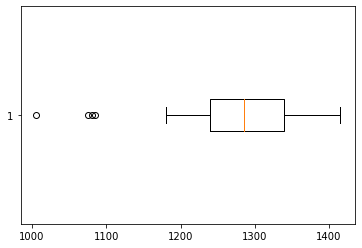

In [3]:
plt.boxplot(Univ["SAT"],vert = False)
plt.show

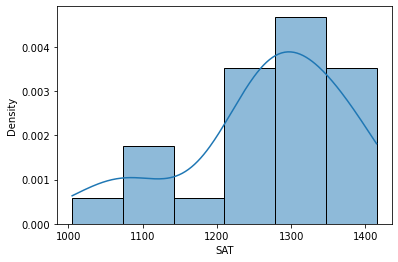

In [4]:
import seaborn as sns 
sns.histplot(Univ["SAT"],kde = True,stat="density")
plt.show()

In [5]:
Univ1=Univ.iloc[:,1:]
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [6]:
cols = Univ1.columns

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = pd.DataFrame(scaler.fit_transform(Univ1),columns = cols )
scaled_Univ_df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


In [13]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=3, random_state=0)

In [14]:
clusters_new.labels_

array([1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 2])

In [15]:
set(clusters_new.labels_)

{0, 1, 2}

In [19]:
Univ['clusterid_new'] = clusters_new.labels_

In [20]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [21]:
Univ.sort_values(by = "clusterid_new")

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
17,TexasA&M,1075,49,67,25,8704,67,0
15,Purdue,1005,28,90,19,9066,69,0
13,PennState,1081,38,54,18,10185,80,0
23,UWisconsin,1085,40,69,15,11857,71,0
0,Brown,1310,89,22,13,22704,94,1
22,UVA,1225,77,44,14,13349,92,1
21,UPenn,1285,80,36,11,27553,90,1
20,UMichigan,1180,65,68,16,15470,85,1
19,UChicago,1290,75,50,13,38380,87,1
18,UCBerkeley,1240,95,40,17,15140,78,1


In [23]:
Univ.iloc[:,1:].groupby("clusterid_new").mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clusterid_new,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
1,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
2,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222


Observations:
- Custer 2 appears to be the top rated universties cluster as the cut off score, Top10,SFRration parameter mean values are highest
- Cluster 1 appears to occupy the middle level rated universities
- Cluster 0 comes as the lower level rated universities

[149.99999999999997, 64.1452839501027, 44.531761731450956, 33.654341806512235, 28.622383307274234, 22.704584217335714, 18.568917030859872, 16.171397616965237, 13.47880438976081, 11.02525622519605, 8.779573162733609, 6.739894599461368, 5.493016111483617, 4.468966382874788, 3.62581556215042, 2.9214918222574635, 2.208224124016929, 1.5925725147407326, 1.1758698663599076]


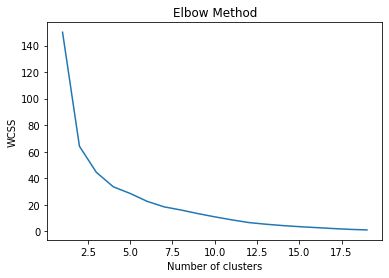

In [28]:
wcss = []
for i in range(1, 20):
    Kmeans = KMeans(n_clusters=i,random_state=0 )
    Kmeans.fit(scaled_Univ_df)
    wcss.append(Kmeans.inertia_)
print(wcss)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Observations
- From the above graph we can choose  3 or 4 which indicates the elboew joint i.e the rate of change of slope decreases
